In [3]:
### Local Modules
import main
import firedb
import models
import visuals


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import holoviews as hv, panel as pn

import mysql.connector

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option("display.max_columns", None)

### <ins>Ben Keesey:</ins>

Working currently as a **<ins>Lead Supply Chain Engineer</ins>** at **<ins>Armada Supply Chain Solution</ins>**.

Main working tasks include data analytics, data cleaning, sourcing/channel analysis (flow/network optimization).

# <ins>Final Static Dashboard:</ins>

***


***

![alt text](Assets/HSA_and_Portfolio_Success_Analysis.png "HSA and Portfolio Success Analysis")

# Database Connection:
***

Stores, loads, and returns user infomation to run models.

In [100]:
d = {
    'user_id': 'John3055', 'name': 'John', 'age': 30, 'retirement_age': 55, 'yearly_savings': 20000, 'time_window': 40
    , 'retirement_spend': 60000, 'yearly_HSA_qualified_expense': 3000, 'balance_brokerage': 48000, 'balance_HSA': 15000
    , 'balance_401k': 130000, 'balance_roth': 24000, 'balance_HSA_qualified_expense': 15000, 'balance_401k_contributions': 80000
    , 'growth_comparison_starting_balance': 0, 'HSA_contribution_limit': 3600, 'Roth_contribution_limit': 6000
    , 'Traditional_401k_contribution_limit': 20500, 'Expense_Ratio': .1, 'Marginal_Tax_Rate': 32
    , 'Capital_Gains_Tax': 15, 'Retired_Marginal_Tax_Rate': 24, 'Retired_Capital_Gains_Tax': 0
    , 'color_scheme': 'stickies'
}

In [101]:
user_var_series = pd.Series(data=d)

In [102]:
firedb.load_new_user_profile(user_var_series)

1 record inserted.


In [103]:
df = firedb.return_user_profile('John1855')
df

user_id  name  age  retirement_age  yearly_savings  time_window  \
0  John1855  John   30              55           20000           50   

   retirement_spend  yearly_HSA_qualified_expense  balance_HSA  \
0             60000                          3600        10800   

   balance_brokerage  balance_401k  balance_roth  \
0               6000          5000          6000   

   balance_HSA_qualified_expense  balance_401k_contributions  \
0                           8000                        5000   

   growth_comparison_starting_balance  HSA_contribution_limit  \
0                                5000                    3600   

   Roth_contribution_limit  Traditional_401k_contribution_limit  \
0                     6000                                20500   

   Expense_Ratio  Marginal_Tax_Rate  Capital_Gains_Tax  \
0            0.1                 24                 10   

   Retired_Marginal_Tax_Rate  Retired_Capital_Gains_Tax color_scheme  
0                         24                          0     stickies

Historical Market data stored as table using sqlalchemy

In [104]:
yearly_market_df = firedb.get_market_data()
yearly_market_df

start_Real_Price  end_Real_Price  Real_Return_Percentage
Year                                                          
1871             99.37          109.90               10.596760
1872            113.19          121.57                7.403481
1873            123.13          120.32               -2.282141
1874            125.64          140.50               11.827443
1875            141.34          152.66                8.009056
...                ...             ...                     ...
2017        1532310.54      1799173.67               17.415734
2018        1876445.34      1733302.63               -7.628398
2019        1760053.06      2137761.00               21.460031
2020        2200785.50      2499180.71               13.558578
2021        2558146.38      2885108.72               12.781221

[151 rows x 3 columns]

# Model Calculations:
***

In [105]:
# Create dict from created Series
user_vars_dict = user_var_series.to_dict()

# Create Model instance with required parameters 
Model_instance = models.Model(**user_vars_dict)

#### Models for a singe account type.

In [106]:
Brokerage_models_df, Brokerage_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('Brokerage', yearly_market_df)

HSA_models_df, HSA_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('HSA', yearly_market_df)

Roth_models_df, Roth_models_liquid_df = Model_instance.Monte_Carlo_Growth_Models('Roth', yearly_market_df)
Roth_models_df.head()

1871          1872          1873          1874           1875  \
1  15026.118144  14592.266525  13276.339219  15193.323782   14674.542408   
2  30714.701878  27521.330422  30025.067929  31068.297862   24497.016317   
3  43260.074597  45938.947607  47071.905102  38700.538660   42974.768708   
4  63521.582620  64243.147912  52566.037243  58996.839372   71120.224465   
5  83214.995203  67443.173333  74637.607396  91261.592924  103506.120861   

            1876           1877          1878          1879          1880  \
1   11783.017285   15341.276324  17096.579886  16615.669430  16989.728072   
2   28632.932507   36382.120784  37503.251765  37746.765230  28662.482305   
3   53091.081206   61065.176201  63840.466992  48111.763085  44603.792406   
4   81479.188178   93275.076479  72561.482391  65130.548882  61004.318621   
5  118777.172976  100141.622091  90934.764461  82518.737880  74084.767327   

           1881           1882          1883          1884          1885  \
1  12743.158698   14353.429889  14254.375857  13505.288357  17785.550149   
2  27802.550106   29298.433539  27660.395437  35447.240101  36220.300636   
3  43394.669900   42599.684927  53958.737663  56602.665030  47208.683969   
4  56597.753809   73495.758428  77965.744655  66522.589884  62030.604955   
5  91801.887553  100512.323010  86765.801221  81732.614434  81664.350635   

           1886          1887          1888          1889          1890  \
1  15694.996147  12887.078034  13873.285398  14684.996495  11635.465923   
2  27759.330981  27019.323009  29665.080865  24199.199474  30442.227423   
3  42190.426660  43859.898235  37015.395151  45598.200180  43996.212419   
4  60241.339701  49159.756460  61058.724852  59136.350323  53244.090095   
5  63174.881750  75708.797491  74580.721950  67240.199089  72708.935356   

           1891          1892          1893          1894          1895  \
1  16406.049098  13585.790817  12572.347988  14793.252768  13969.015007   
2  29974.698993  25131.560476  28468.688185  29163.659853  28327.477167   
3  40282.079352  42129.835605  43210.157100  43940.147944  47526.121803   
4  58609.648496  57241.978668  58373.083975  65223.578058  72164.417671   
5  74168.945842  72790.940578  81583.767656  93057.721339  74769.634568   

           1896          1897          1898          1899          1900  \
1  13974.155021  15416.030255  16055.919325  11856.514132  16508.277311   
2  31256.177063  34255.811831  25854.104895  30900.234902  33812.394157   
3  52956.408835  41720.816858  47891.125344  49974.944332  44862.669350   
4  58024.044259  67150.837191  69056.165046  60156.036354  50769.299975   
5  86940.410646  90685.332386  78211.114797  64050.143044  81016.534578   

           1901          1902          1903          1904          1905  \
1  15273.160791  12868.624629  11810.313955  17117.241770  15885.013389   
2  27320.431476  22985.497560  31981.947605  35878.220353  28804.859863   
3  35535.525213  46047.265222  53240.430000  48336.868115  30975.168775   
4  61842.990043  69668.941668  65298.570292  45242.572418  59055.835244   
5  88118.596099  81348.112821  57632.463326  77958.140318  76864.413948   

           1906          1907          1908          1909          1910  \
1  13286.278319   9934.292831  18018.089025  14387.778025  13682.881021   
2  19639.423674  31179.631131  33449.562240  28158.340938  28654.349144   
3  44037.565802  47373.484760  47336.291340  43857.467984  42764.003411   
4  60976.213430  61345.068928  63999.464214  58150.495906  50256.981580   
5  75030.695248  78712.441328  78535.436461  63976.352510  58394.934667   

           1911          1912          1913          1914          1915  \
1  14283.650911  13764.037506  12126.444328  12436.715482  17693.146790   
2  28219.971834  24399.152751  23525.916800  33872.899187  30911.213915   
3  37288.791195  34748.871421  48299.580562  46893.492426  28948.697881   
4  46535.986568  62900.270527  61144.096146  39343.070700  42596.053695   
5  7

#### Series tracking yearly deposits

In [107]:
cash_balance_df = Model_instance.cash_balance()
cash_balance_df.head()

0
1  13600.0
2  27200.0
3  40800.0
4  54400.0
5  68000.0

#### Models for all accounts including spending in retirement.

In [108]:
Net_Return_Spending_df, Liquid_Return_Spending_df = Model_instance.Monte_Carlo_Plot_Spending(yearly_market_df)
Net_Return_Spending_df.head()

1              2              3              4   \
1871  257977.592870  294657.376496  304412.642189  358312.793403   
1872  250736.849544  261537.361712  310492.357496  352909.587867   
1873  228603.401513  273751.048566  313303.200593  286327.035127   
1874  260768.162397  299279.643845  274177.048983  327719.766586   
1875  252109.988482  233309.338362  281704.435056  373825.831475   

                 5              6              7              8   \
1871  404450.535820  365296.934129  430385.148511  560274.080000   
1872  320641.942909  380099.359270  497252.574465  626225.084268   
1873  341447.680716  448789.828024  567148.960029  727105.444453   
1874  431482.784700  545952.053708  700555.597836  672512.768423   
1875  475708.839363  613069.962480  590538.993780  640709.986892   

                 9              10             11            12            13  \
1871  703018.346631  896391.460151  856010.376675  9.207258e+05  9.822710e+05   
1872  800728.611994  766374.578472  826192.598422  8.832513e+05  8.941572e+05   
1873  697389.894073  753430.979321  807029.446354  8.184661e+05  1.088481e+06   
1874  727158.082061  779476.402227  791104.909392  1.052593e+06  1.231753e+06   
1875  688929.682004  701188.764805  935406.778449  1.096770e+06  1.055552e+06   

                14            15            16            17            18  \
1871  9.924872e+05  1.315379e+06  1.534657e+06  1.470485e+06  1.517112e+06   
1872  1.187197e+06  1.386990e+06  1.330559e+06  1.374410e+06  1.500963e+06   
1873  1.273236e+06  1.222768e+06  1.264478e+06  1.382356e+06  1.197369e+06   
1874  1.183460e+06  1.224370e+06  1.339011e+06  1.160285e+06  1.416660e+06   
1875  1.093928e+06  1.198306e+06  1.039905e+06  1.271780e+06  1.287610e+06   

                19            20            21            22            23  \
1871  1.654904e+06  1.430546e+06  1.742200e+06  1.757538e+06  1.640612e+06   
1872  1.298843e+06  1.583668e+06  1.599172e+06  1.494213e+06  1.642206e+06   
1873  1.461484e+06  1.477115e+06  1.381379e+06  1.519577e+06  1.577890e+06   
1874  1.432338e+06  1.339985e+06  1.474510e+06  1.531587e+06  1.590776e+06   
1875  1.206194e+06  1.329136e+06  1.382320e+06  1.437457e+06  1.646182e+06   

                24            25            26            27            28  \
1871  1.801290e+06  1.867159e+06  1.857855e+06  2.043798e+06  2.351275e+06   
1872  1.703811e+06  1.767717e+06  1.940695e+06  2.228156e+06  1.882512e+06   
1873  1.638367e+06  1.873722e+06  2.147733e+06  1.812399e+06  2.138392e+06   
1874  1.819706e+06  2.164134e+06  1.826698e+06  2.153944e+06  2.357744e+06   
1875  1.959678e+06  1.723427e+06  2.027145e+06  2.214364e+06  2.035281e+06   

                29            30            31            32            33  \
1871  1.989847e+06  2.337382e+06  2.437262e+06  2.118512e+06  1.652047e+06   
1872  2.225075e+06  2.402688e+06  2.085797e+06  1.623638e+06  1.855864e+06   
1873  2.341471e+06  2.117771e+06  1.651403e+06  1.890811e+06  2.020817e+06   
1874  2.170950e+06  1.815738e+06  2.097645e+06  2.262403e+06  2.022534e+06   
1875  1.707449e+06  2.067783e+06  2.227523e+06  1.988459e+06  1.264815e+06   

                34            35            36            37            38  \
1871  1.891621e+06  2.034832e+06  1.860213e+06  1.231136e+06  1.503402e+06   
1872  1.979998e+06  1.772732e+06  1.167235e+06  1.418742e+06  1.373243e+06   
1873  1.786521e+06  1.160424e+06  1.409719e+06  1.363697e+06  1.244327e+06   
1874  1.289706e+06  1.571460e+06  1.534807e+06  1.416480e+06  1.360005e+06   
1875  1.504161e+06  1.463610e+06  1.344849e+06  1.284773e+06  1.172589e+06   

                39            40  
1871  1.462807e+06  1.344041e+06  
1872  1.253932e+06  1.189285e+06  
1873  1.179198e+06  1.065741e+06  
1874  1.248728e+06  9.857491e+05  
1875  9.178595e+05  7.116698e+05

# Creating Visuals:
***

In [109]:
# Create Model instance with required parameters 
visual_param_dict = {k:user_vars_dict[k] for k in ('name','time_window','color_scheme') if k in user_vars_dict}
Visuals_instance = visuals.Visualization(**visual_param_dict)

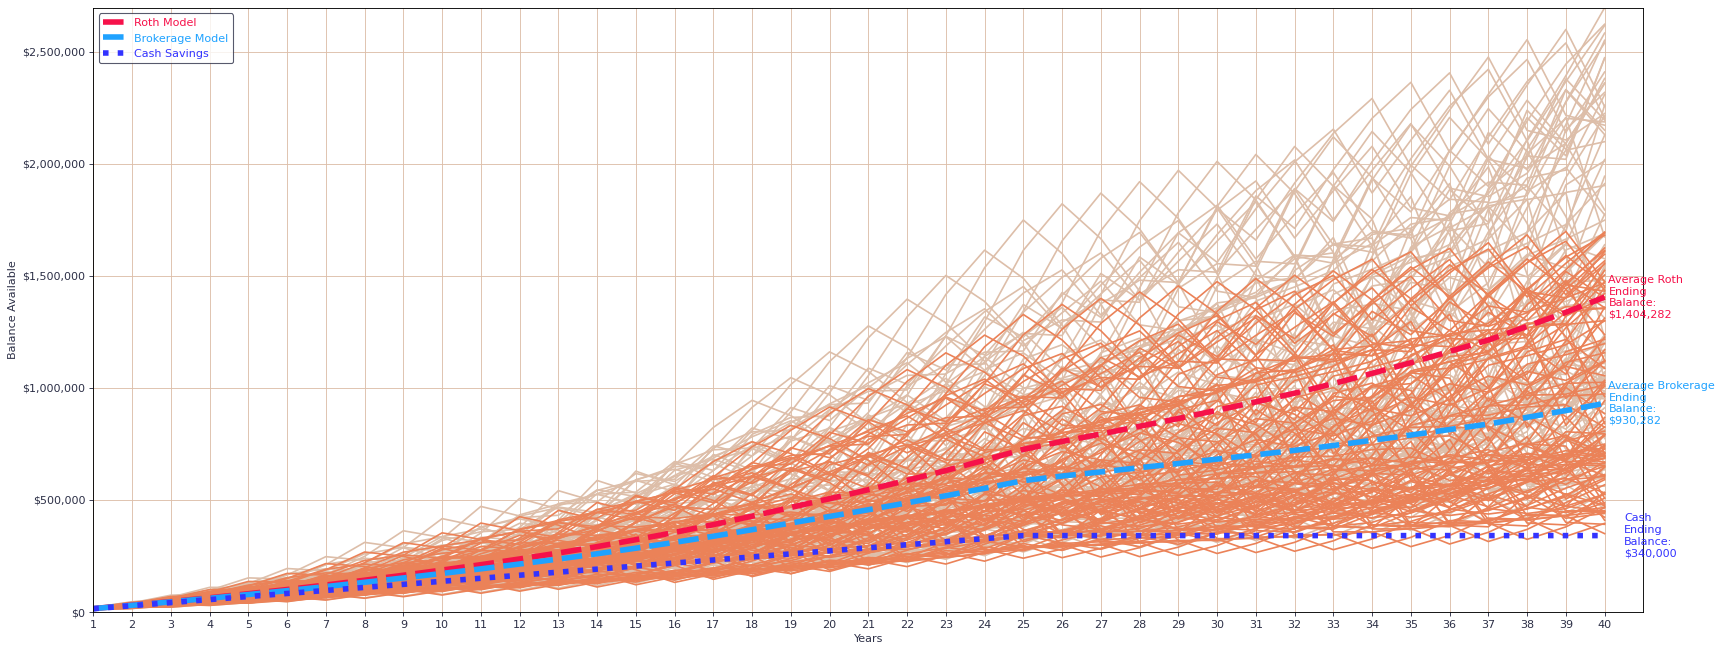

In [110]:
Visuals_instance.Monte_Carlo_Plot_Growth_Comparison(account1=Roth_models_df, 
        account1_name='Roth', account2=Brokerage_models_df, account2_name='Brokerage', cash_account=cash_balance_df)

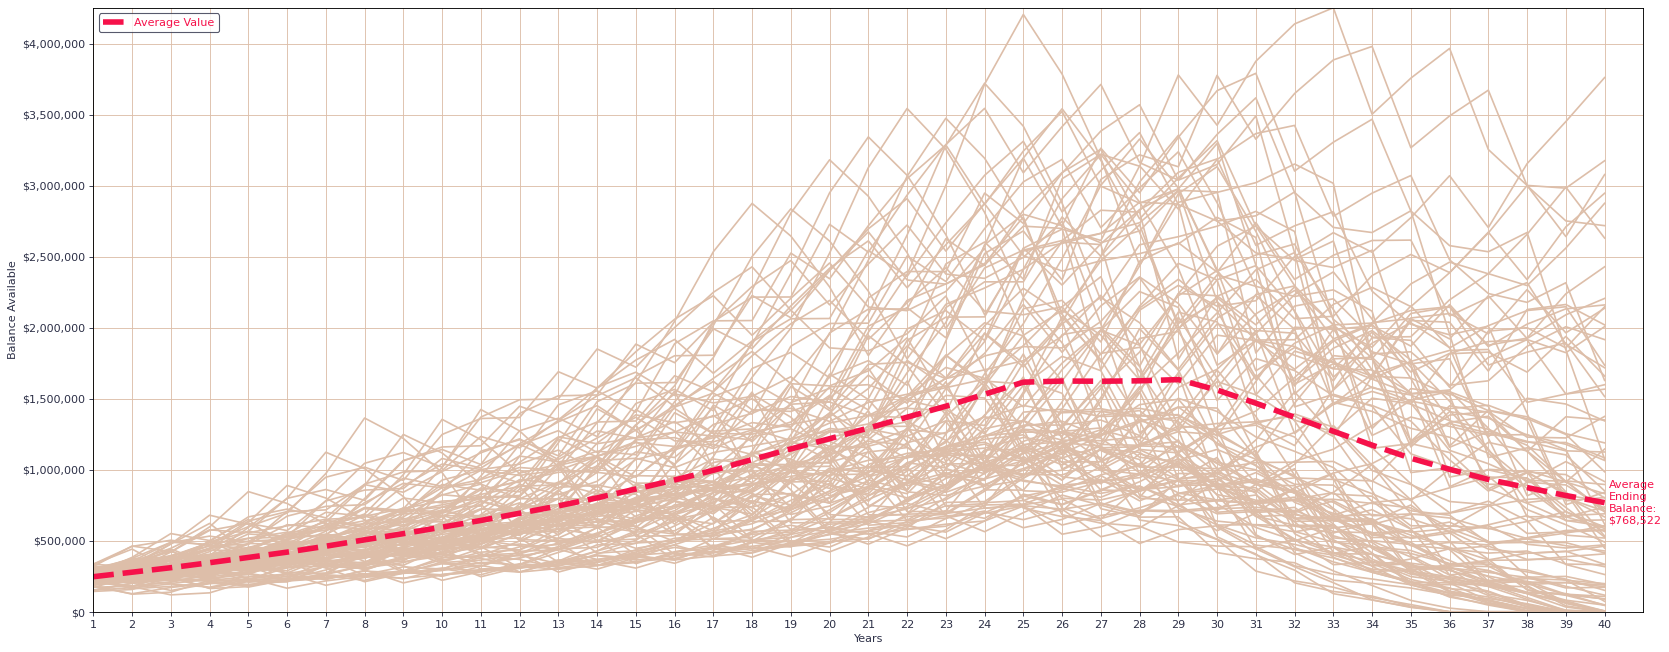

In [111]:
Visuals_instance.spending_fire_plot(df=Net_Return_Spending_df, file_name=f"Assets/{Visuals_instance.name}'s Plot")

Column(align='center', background='#ffffff', sizing_mode='stretch_height', width=1250)
    [0] Row(background='#ffffff', height=70, sizing_mode='fixed', width=1250)
        [0] Markdown(str, margin=(10, 5, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'}, width=500)
        [1] Spacer()
        [2] PNG(str, align='center', height=60, sizing_mode='fixed')
        [3] PNG(str, align='center', height=60, sizing_mode='fixed')
    [1] Row(background='#ffffff', height=300, sizing_mode='fixed', width=1250)
        [0] Markdown(str, height=300, margin=(10, 5, 10, 15), sizing_mode='scale_both', style={'color': '#2d3047'}, width=1250)
    [2] Column(background='#ffffff', height=300, sizing_mode='fixed', width=1250)
        [0] Markdown(str, height=50, margin=(10, 5, 5, 15), sizing_mode='fixed', style={'color': '#2d3047'}, width=1250)
        [1] Markdown(str, margin=(10, 5, 10, 15), sizing_mode='scale_both', style={'color': '#2d3047'}, width=1250)
    [3] Row(background='#ffffff', width=1250)
        [0] PNG(str, align='center', sizing_mode='scale_both')
    [4] Column(background='#ffffff', sizing_mode='stretch_height', width=1250)
        [0] Markdown(str, height=50, margin=(10, 5, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'}, width=500)
        [1] Markdown(str, height=150, margin=(10, 5, 10, 15), sizing_mode='fixed', style={'color': '#2d3047'}, width=1250)
    [5] Row(background='#ffffff', height=70, sizing_mode='fixed', width=1250)
        [0] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [1] Markdown(str, align='center', height=70, margin=(10, 5, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [2] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [3] Markdown(str, align='center', height=70, margin=(10, 15, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [4] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [5] Markdown(str, align='center', height=70, margin=(10, 15, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
    [6] Row(background='#ffffff', width=1250)
        [0] PNG(str, align='center', sizing_mode='scale_both')
    [7] Row(background='#ffffff', height=70, sizing_mode='fixed', width=1250)
        [0] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [1] Markdown(str, align='center', height=70, margin=(10, 5, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [2] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [3] Markdown(str, align='center', height=70, margin=(10, 15, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [4] Markdown(str, align='center', height=70, margin=(10, 0, 10, 15), sizing_mode='stretch_width', style={'color': '#2d3047'})
        [5] Markdown(str, align='center', height=70, margin=(10, 15, 10, 0), sizing_mode='stretch_width', style={'color': '#2d3047'})
    [8] Row(background='#ffffff', width=1250)
        [0] PNG(str, align='center', sizing_mode='scale_both')
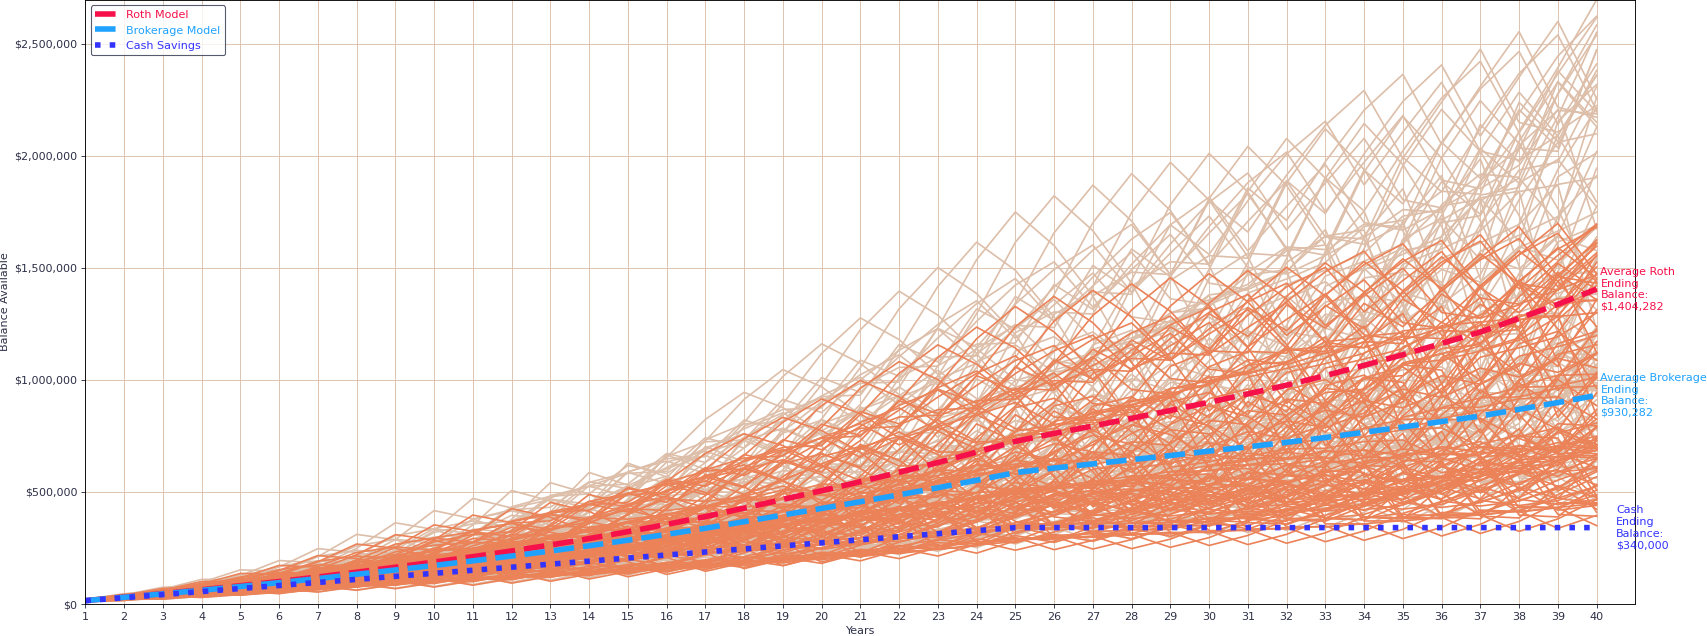
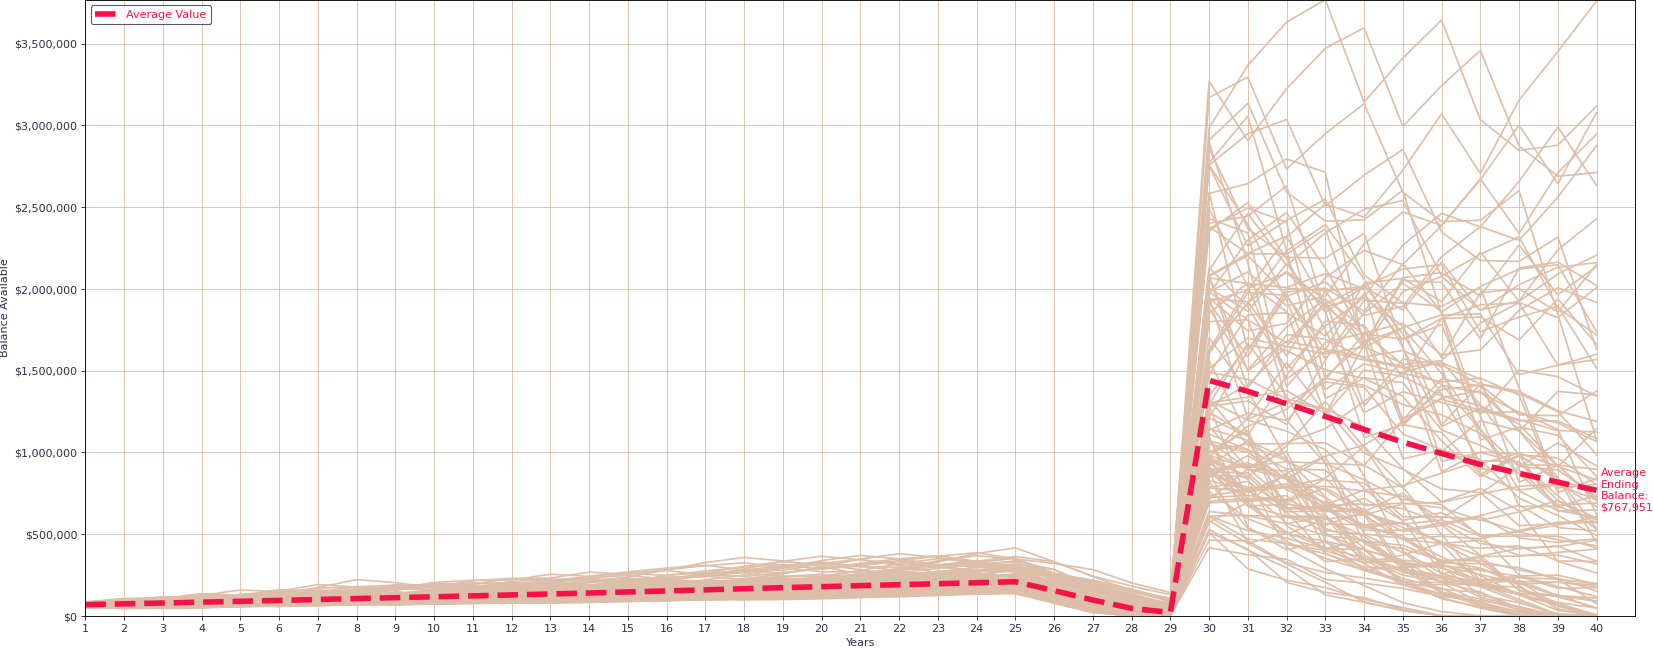
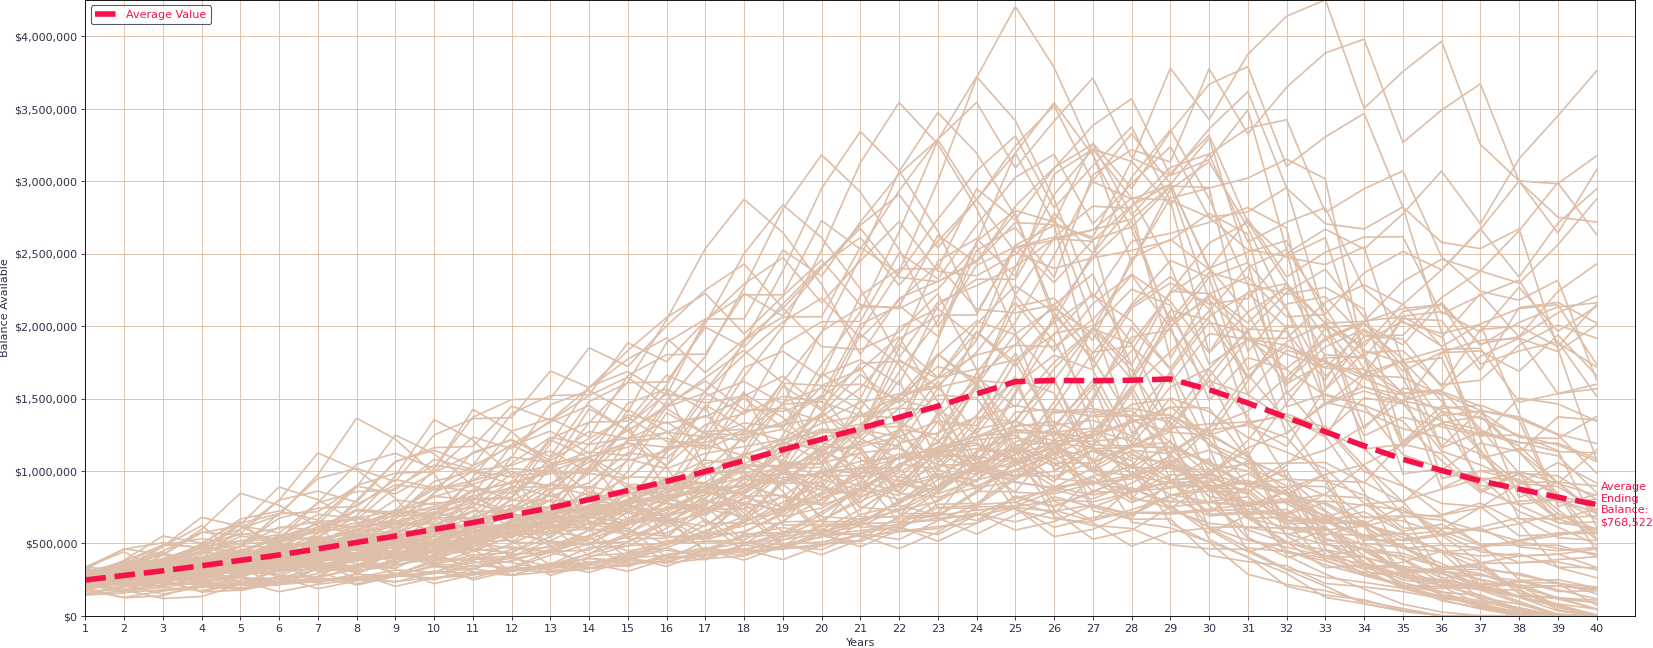
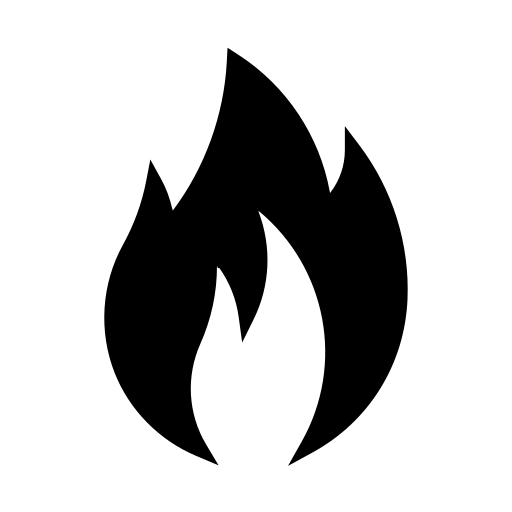
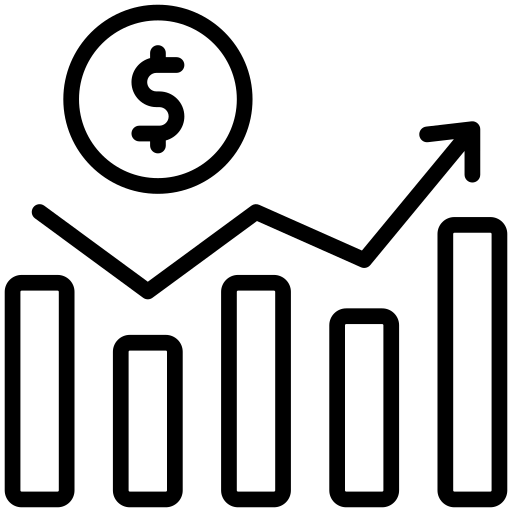

In [112]:
pn.extension()
Visuals_instance.Dashboard(Liquid_Return_Spending_df, Net_Return_Spending_df)

# Future Steps:
-------------


- Use the panel framework to make the Dashboard interactive instead of static.
- Allow for dynamic adjustment of withdraws or qualified expenses as user ages.
- More visuals, statistics, tests, and other features.

# My Github

### Citations:
----------

- http://www.econ.yale.edu/~shiller/data.htm
- https://www.firecalc.com/

### Appendix
-----------

In [ ]:
vis_dict = {}
for k in('name','time_window','color_scheme'):
    if k in user_vars_dict:
        vis_dict[k] = user_vars_dict[k]

vis_dict

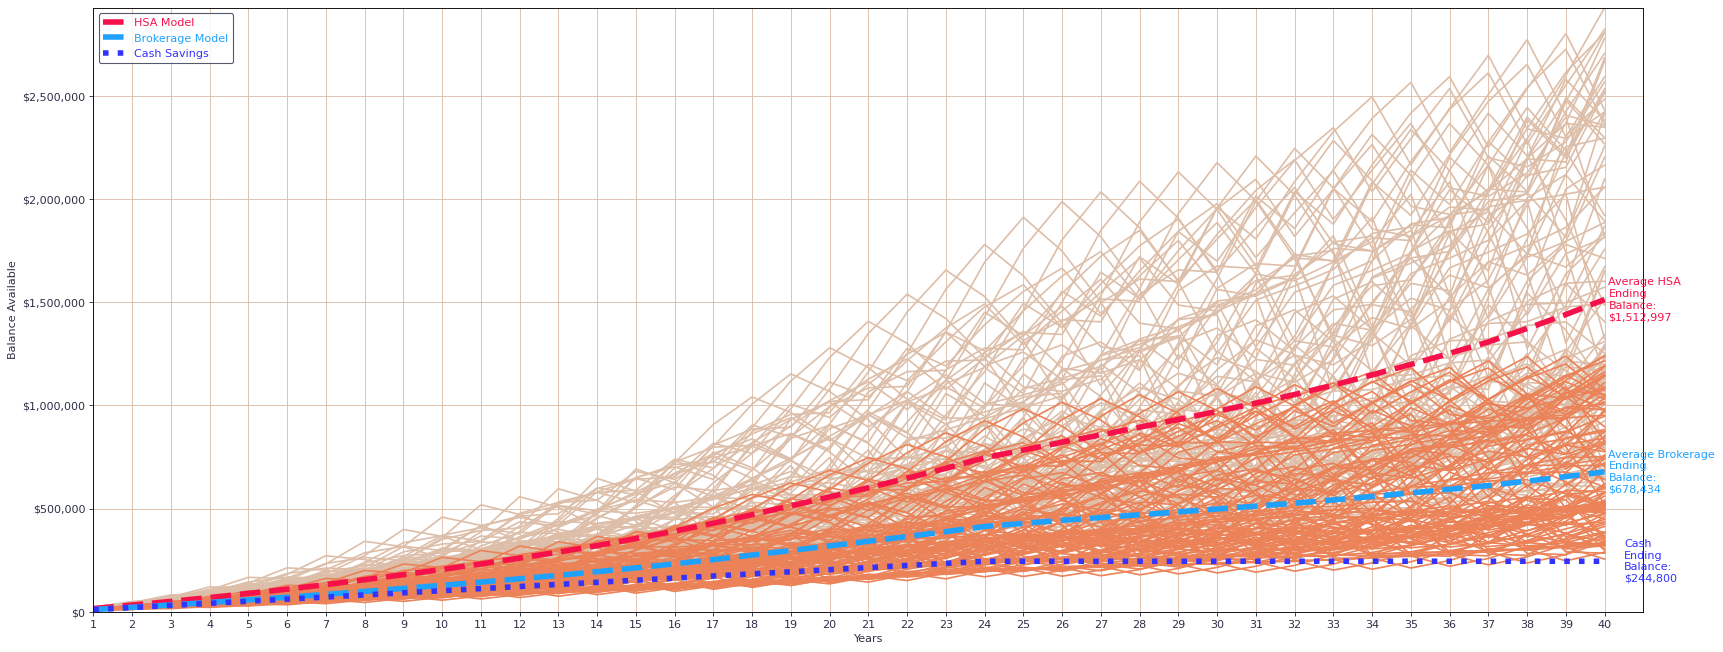

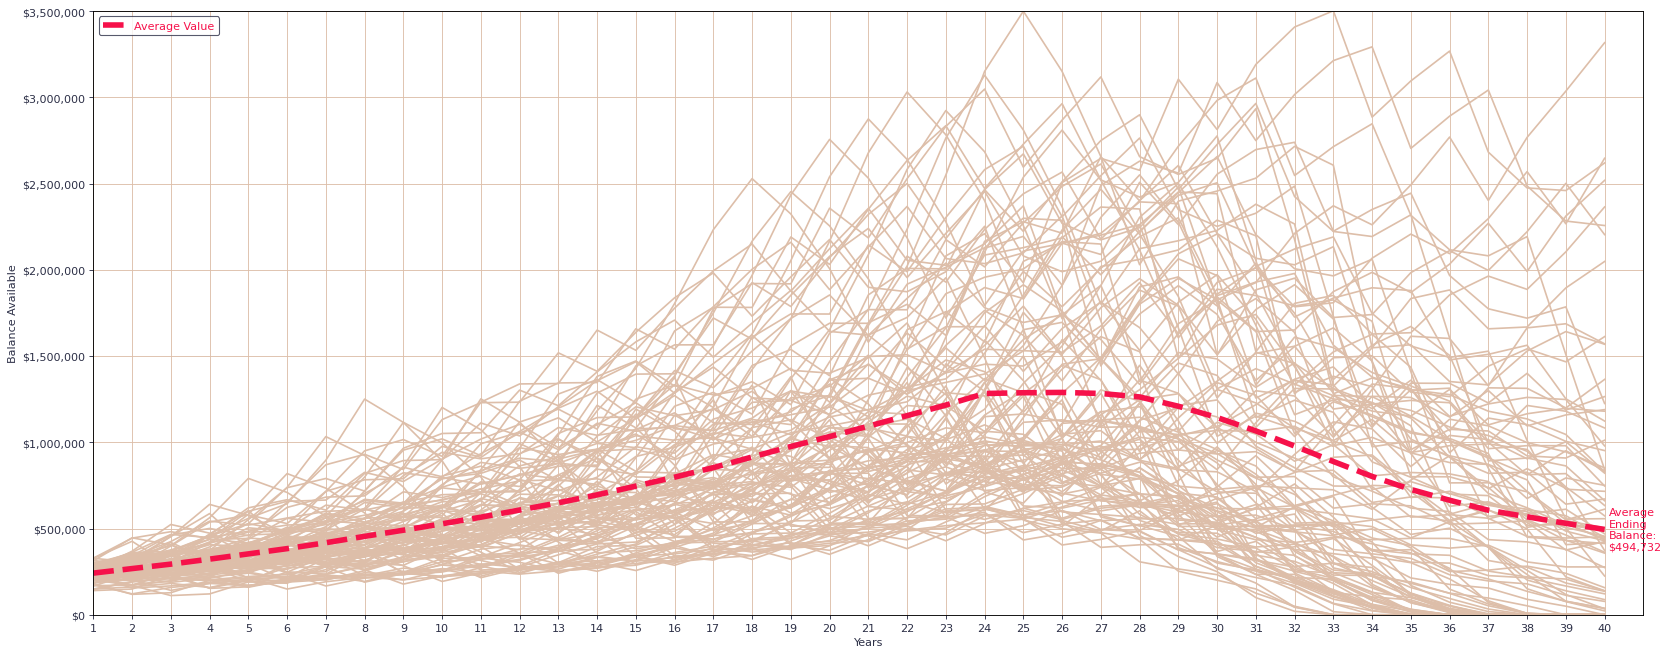

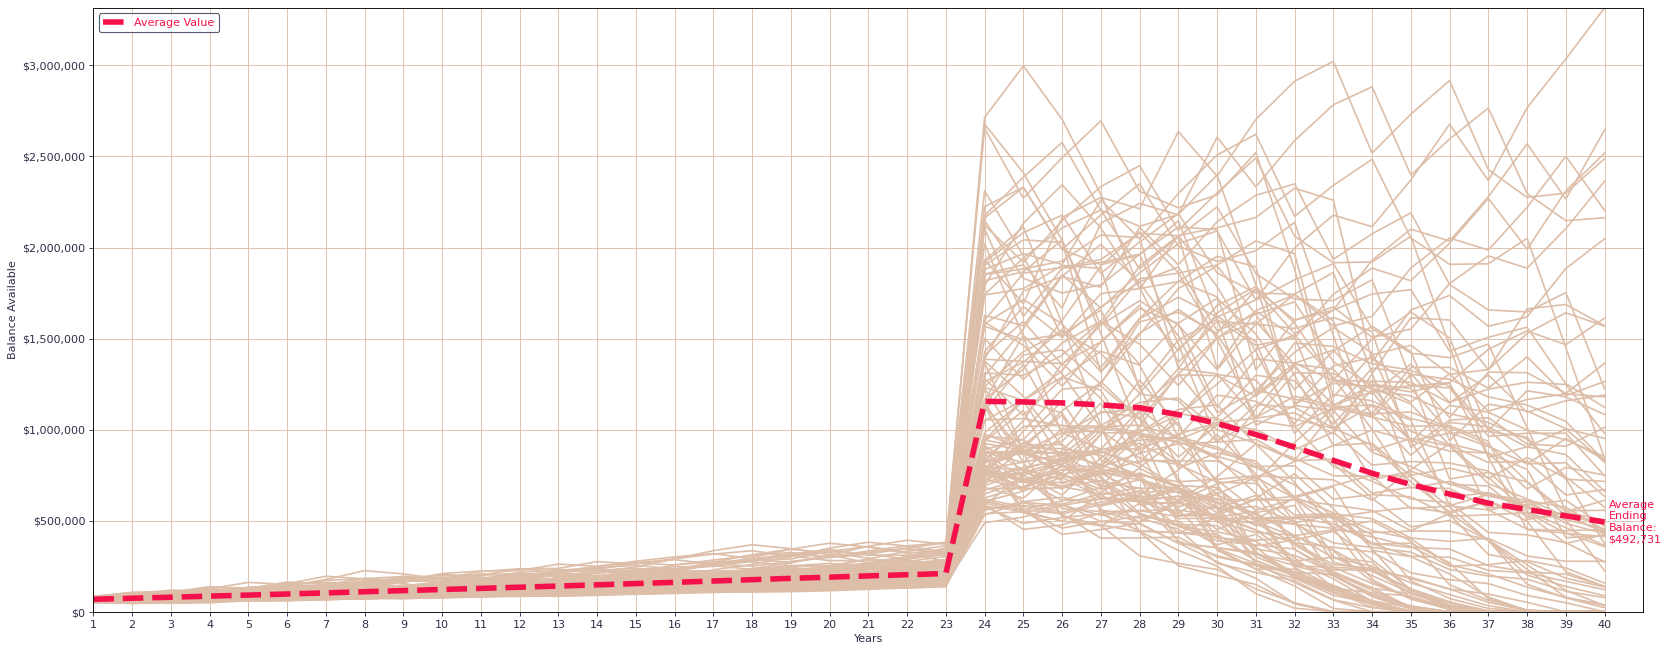

In [14]:
main.main('John3660')

In [ ]:
df = firedb.return_user_profile('Ben2752')
df

In [18]:
mydb = mysql.connector.connect(
  host="localhost",
  user="bkeesey",
  password="69CCHGtoXy",
  database="firedb"
)

print(mydb)

In [19]:
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('firedb',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [ ]:
# Import dataframe into MySQL
import sqlalchemy
user = 'bkeesey'
password = '69CCHGtoXy'
port = 3306
host = '127.0.0.1'
dbname = 'myfirstdatabase'

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password))

In [ ]:
user_info = {'user':'bkeesey', 'password':'69CCHGtoXy', 'port':3306, 'host':'127.0.0.1'}

In [ ]:
pd.DataFrame.from_dict(user_info, orient='index').rename(columns={0: 'value'}).to_pickle('user_info.pkl')

In [ ]:
df = pd.read_pickle("user_info.pkl")

In [ ]:
db_info.loc['port'].astype(int)

In [ ]:
"mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password)

In [ ]:
"mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['port'].astype(int)
    , db='myfirstdatabase', user=db_info.loc['user'].value, pw=db_info.loc['password'])

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['host'].value
    , db='myfirstdatabase', user=db_info.loc['user'].value, pw=db_info.loc['password'].value))

In [ ]:
engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=host, db=dbname, user=user, pw=password))

In [ ]:
def historical_market_data():
    market_data_df = pd.read_csv(r'C:\Users\benjk\Documents\GitHub\fire_report\Data\ie_Data.csv', header=7)
    market_data_df = market_data_df.dropna(axis=1, how='all').dropna(axis=0, how='all')
    market_data_df = market_data_df.loc[market_data_df['Date'].notna()].copy()
    
    data_col_names = [
    'Date',
    'S&P_Comp_P',
    'Dividend',
    'Earnings',
    'CPI',
    'Date_Fraction',
    'Long_Interest_Rate_GS10',
    'Real_Price',
    'Real_Dividend',
    'Real_Total_Return_Price',
    'Real_Earnings',
    'Real_TR_Scaled_Earnings ',
    'CAPE',
    'TR_CAPE',
    'CAPE_Yield',
    'Monthly_Total_Bond_Returns',
    'Real_Total_Bond_Returns',
    '10_Year_Annualized_Stock_Real_Return',
    '10_Year_Annualized_Bond_Real_Return',
    'Real_10_Year_Excess_Annualized_Returns']
    
    market_data_df.columns = data_col_names
    market_data_df['Year'] = market_data_df['Date'].apply(np.floor).astype(int)
    market_data_df['Real_Total_Return_Price'] = market_data_df['Real_Total_Return_Price'].str.strip().str.replace(',','').astype(float)
    
    # Calculate the monthly returns. Currently only implementing the yearly returns, but this could be used to increase model resolution.
    market_data_df['Real_Monthly_Return'] = market_data_df['Real_Total_Return_Price'].diff()
    market_data_df['Real_Monthly_Return_Percentage'] = (market_data_df['Real_Monthly_Return']/market_data_df['Real_Total_Return_Price'])*100
    
    yearly_market_df = pd.DataFrame()
    yearly_market_df['start_Real_Price'] = market_data_df.groupby('Year')['Real_Total_Return_Price'].first()
    yearly_market_df['end_Real_Price'] = market_data_df.groupby('Year')['Real_Total_Return_Price'].last()
    yearly_market_df['Real_Return_Percentage'] = ((yearly_market_df['end_Real_Price'] - yearly_market_df['start_Real_Price'])/yearly_market_df['start_Real_Price'])*100
    
    return yearly_market_df

In [ ]:
yearly_market_df = historical_market_data()

In [ ]:
# Import dataframe into MySQL
import sqlalchemy
user = 'bkeesey'
password = '69CCHGtoXy'
port = 3306
host = '127.0.0.1'
dbname = 'firedb'

In [ ]:
db_info = pd.read_pickle("user_info.pkl")

engine = sqlalchemy.create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=db_info.loc['host'].value
    , db=dbname, user=db_info.loc['user'].value, pw=db_info.loc['password'].value))

In [ ]:
yearly_market_df.to_sql('yearly_market_df', engine, if_exists='replace')

In [ ]:
pd.read_sql_query('SELECT * FROM user_fire_report_info WHERE user_id = "Ben2752"', engine)

In [ ]:
df = pd.read_sql_query('SELECT * FROM user_fire_report_info WHERE user_id = Ben2752;', engine)

In [ ]:
df

In [ ]:
df.set_index('Year')

In [ ]:
pd.read_sql_table('yearly_market_df', engine)  

In [ ]:
db_info

In [ ]:
import mysql.connector
import mysql.connector as connection
import pandas as pd
try:
    mydb = connection.connect(host="127.0.0.1", database = 'myfirstdatabase',user="bkeesey", passwd="69CCHGtoXy",use_pure=True)
    query = "select * from myfirstdatabase.input_parameters"
    result_dataFrame = pd.read_sql(query,mydb)
    # mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))
    
# result_dataFrame

In [ ]:
str_cols = str(tuple(s.index.values))

In [ ]:
str_cols.replace("'","")

In [ ]:
str(tuple(s.index.values)).strip("age")

In [ ]:
"hello".strip('h')

In [ ]:
str_cols = str(tuple(s.index.values))
str_cols = str_cols.replace("'","")

In [ ]:
mydb = connection.connect(host="127.0.0.1", database = 'myfirstdatabase',user="bkeesey", passwd="69CCHGtoXy",use_pure=True)
mycursor = mydb.cursor()

sql = f"INSERT INTO user_fire_report_info {str_cols} VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
val = tuple(s.values)
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

mydb.close()

In [ ]:
class Plot_Vars(object):


    def __init__(self, **argd):
        """
        Constructs all the necessary attributes for the fire report from the passed dict.
        """
        self.__dict__.update(argd)
    

    def color_schemes(self):  
        ### Color Schemes
        # Follows the following order:
        # 0-3 are the main colors
        # 4 is accent
        # 5 is an alternate color for accent
        # 6 is the background color
        # 7 is the font color 
        color_schemes_available = {
                                'office_pastel':('#b76e79', '#87907d', '#d2a9aa', '#b6c9b3', '#e1d1d1', '#d2a9aa', '#ffffff', '#535253'),
                                'mountain_range':('#a84729', '#456c3d', '#62341e', '#848a56', '#b3995b', '#d29057', '#b0bb9b', '#0F0F0F'),
                                'xerox':('#242424', '#494949', '#404048', '#282828', '#e2e6e6', '#b6b6b6', '#ffffff', '#000000'),
                                'stickies':('#f6114a', '#1fa2ff', '#3333ff', '#661fff', '#ddbea9', '#eb8258', '#ffffff', '#2d3047'),
                                'miami_sunrise':('#fb8500', '#5390d9', '#f8961e', '#f9c74f', '#f79d84', '#C8D7FF', '#FFF5D6', '#023047')
                                }
        if self.color_scheme in color_schemes_available:
            return color_schemes_available[self.color_scheme]
        else:
            import warnings
            warnings.warn("Warning! No valid color scheme picked, default selected.\nPlease pick from the following choices:\noffice_pastel\nmountain_range\nxerox\nstickies\nmiami_sunrise")
            return color_schemes_available['Deserted_6_color']

    def vis_colors(self):
        # Getting color palette information
        self.color_1 = self.color_schemes()[0]
        self.color_2 = self.color_schemes()[1]
        self.color_3 = self.color_schemes()[2]
        self.color_4 = self.color_schemes()[3]
        self.color_accent = self.color_schemes()[4]
        self.color_alt = self.color_schemes()[5]
        self.color_background = self.color_schemes()[6]
        self.color_font = self.color_schemes()[7]

In [ ]:
Main_Plot = Plot_Vars(**person_vars_dict)

In [ ]:
class child(Plot_Vars):
    pass

In [ ]:
deposits_before_retirement = 448800

In [ ]:
import numpy as np

In [ ]:
person_vars_dict = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)['Value'].to_dict()

In [ ]:
df = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)

In [ ]:
df['Value']['name']

In [ ]:
person_vars_dict['color_scheme']

In [ ]:
person_vars_dict

In [ ]:
{k:person_vars_dict[k] for k in ('name','time_window','color_scheme') if k in person_vars_dict}

In [ ]:
import numpy as np
import pandas as pd


def cash_balance(yearly_savings, Marginal_Tax_Rate, age, retirement_age, time_window):
    # Cash investment, showing just yearly savings
    # Cash Contributions are also made after tax. Yearly Savings in based of a Gross number
    after_tax_yearly_investment = yearly_savings*(1-Marginal_Tax_Rate/100)
    # years where you would still make cash deposits
    years_until_retirement = retirement_age-age
    deposits_before_retirement = np.arange(start=after_tax_yearly_investment, stop=after_tax_yearly_investment*(years_until_retirement+1), step=after_tax_yearly_investment)
    if len(deposits_before_retirement) >= time_window:
        deposit_balance = deposits_before_retirement[0:time_window]
    else:
        deposit_balance = np.concatenate([deposits_before_retirement, np.full(time_window-len(deposits_before_retirement), deposits_before_retirement[-1])])

    plot_index = np.arange(1,time_window+1)
    
    cash_balance_df = pd.DataFrame(deposit_balance,plot_index)
    return cash_balance_df

In [ ]:
cash_balance(1000, 32, 20,50,50)[0].iloc[-1]

In [ ]:
plt.plot(cash_balance(1000, 32, 20,50,50), linestyle='dotted', linewidth=5, color='red', label='Cash Savings')

In [ ]:
    plt.plot(np.arange(1,self.time_window+1), deposit_balance, linestyle='dotted', linewidth=5, color=self.color_3, label='Cash Savings')
    ax.legend(labelcolor=[self.color_1, self.color_2, self.color_3], loc='upper left', edgecolor=self.color_font, facecolor=self.color_background)

In [ ]:
60-27

In [ ]:
30-(60-27)

In [ ]:
x = np.arange(start=1000, stop=1000*(60-27+1), step=1000)

In [ ]:
len(x)

In [ ]:
a = np.full(5, 8)
a

In [ ]:
x[0:30]

In [ ]:
np.linspace(deposits_before_retirement, deposits_before_retirement, num=30-(60-27))

In [ ]:
Main_Plot.name

In [ ]:
TERRY = child(**person_vars_dict)

In [ ]:
TERRY.name

In [ ]:
os.getcwd()

In [ ]:
from fire import models

In [ ]:
models.Model

In [ ]:
person_vars_dict = pd.read_excel(r'Data\input.xlsx', sheet_name='Input Parameters', index_col=1).drop('Unnamed: 0',axis=1)['Value'].to_dict()

In [ ]:
Main_Plot = HSA.Plot_Vars(**person_vars_dict)

In [ ]:
import imgkit

# C:\Users\benjk\Downloads\wkhtmltoimage.exe
config = imgkit.config(wkhtmltoimage=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe')
imgkit.from_file('Assets/HSA and Portfolio Success Analysis.html', 'Assets/out.jpg', config=config)

In [ ]:
config = imgkit.config(wkhtmltoimage=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe')
imgkit.from_url('http://google.com', 'Assets/out.jpg', config=config)

In [ ]:
person_vars_dict

In [ ]:
inital_balance_dict = {'balance_brokerage':Main_Plot.balance_brokerage, 'balance_HSA':Main_Plot.balance_HSA, 
                       'balance_401k':Main_Plot.balance_401k, 'balance_roth':Main_Plot.balance_roth, 
                       'balance_HSA_qualified_expense':Main_Plot.balance_HSA_qualified_expense, 'balance_401k_contributions':Main_Plot.balance_401k_contributions}

In [ ]:
inital_balance_dict

In [ ]:
Main_Plot.yearly_savings//Main_Plot.HSA_contribution_limit

In [ ]:
yearly_market_df = HSA.historical_market_data()

In [ ]:
163517.49248499007*(1+15.424699730837066/100)

In [ ]:
Main_Plot.model_account_returns_with_spending(inital_balance_dict, 1960, yearly_market_df)

In [ ]:
yearly_market_df.iloc[89:120]

In [ ]:
Main_Plot.Monte_Carlo_Plot_Spending(yearly_market_df)